# Problema di permutation flowshop

## Job scheduling con algoritmo genetico

Ci sono m macchine e n posti di lavoro. Ogni job contiene esattamente m operazioni. L'i-esima operazione del lavoro deve essere eseguita sulla i-esima macchina. Nessuna macchina può eseguire più di un'operazione contemporaneamente. Per ogni operazione di ogni lavoro, viene specificato il tempo di esecuzione.
Le operazioni all'interno di un lavoro devono essere eseguite nell'ordine specificato. La prima operazione viene eseguita sulla prima macchina, poi (quando la prima operazione è terminata) la seconda operazione sulla seconda macchina, e così via fino all'ennesima operazione. Tuttavia, i lavori possono essere eseguiti in qualsiasi ordine.
L'obiettivo è quello di completare tutti i job nel minore tempo possibile, ovvero minimizzare il makespan.

### Ipotesi iniziali
Si considera un problema dove ci sono m macchine indipendenti, scheduling non preemptive e tempo di rilascio nullo per tutti i job, quindi i job posso essere eseguiti in qualsiasi istante e senza interruzioni.
Il modello di scheduling può essere modellato nel modo seguente:
F_m || C_max

In [1]:
from functions import *
import numpy as np
import re
import time
import csv
import matplotlib.pyplot as plt

population_number: int = 60
iterations_number: int = 35 # numero di generazioni
p_mutation: float = 0.05    # probabilità di mutazione

results = []
    
for filename in os.scandir(os.getcwd() + '\instances'):
    if filename.is_file():
        print(filename.name)
        
        bench_data = []
        dictionary = {}
        file = open(os.getcwd() + '\\instances\\' + filename.name, "rt")
        with file as f:
            for line in f:
               (key, val) = line.split(':')
               dictionary[key] = val    
        file.close()
        
        n_jobs = int(dictionary['number of jobs'])
        n_machines = int(dictionary['number of machines'])
        best_upper_bound = int(dictionary['upper bound'])
 
        
        processing_times = re.findall('\[(.*?)\]', dictionary['processing times'])
        
        i = 1
        for machine_times in processing_times:
            list_times = machine_times.split(' ')
            list_times = [int(x) for x in list_times]
            bench_data.append(list_times)
            #print('machine' + str(i) + ': ')
            #print(list_times)
            i = i + 1
        
        processing_time = [] # tempi di esecuzione del job j sulla macchina i
        for i in range(n_jobs):
            temp = []
            for j in range(n_machines):
                temp.append(bench_data[j][i])
            #print('job' + str(i + 1) + ': ')
            #print(temp)
            processing_time.append(temp)


        
        start_time = time.time()
        # creazione popolazione
        population = initialize_population(population_number, n_jobs)
   

        for evaluation in range(iterations_number):
            print('---- creazione ' + str(evaluation) + ' generazione ----\n')
            parents = get_parents(population, processing_time, n_jobs, n_machines)
            childs = []
            # operatore di crossover per generare nuove sequenze di scheduling
            childs.append(crossover(parents))
        

            # operatore di mutazione
            mutated_childs = []
            for child in childs:
                r = np.random.rand()
                if r < p_mutation:
                    mutated_child = mutation(child)
                    mutated_childs.append(mutated_child)

            childs.extend(mutated_childs)
            if len(childs) > 0:
                update_population(population, childs, processing_time, n_jobs, n_machines)
            print('---- generazione ' + str(evaluation) + ' creata ----\n')
            
        makespans = []
        for individual in population:
            ind_makespan = (calc_makespan(individual, processing_time, n_jobs, n_machines), individual)
            makespans.append(ind_makespan)
        makespans.sort(key=lambda x: x[0])

        best_seq = makespans[0][1]
        best_makespan = makespans[0][0]
        end_time = time.time()
        
        for ms in makespans:
            print(ms)

        print(best_makespan)
        print(best_seq)
        print("--- %s secondi ---" % (end_time - start_time))
        
        #dic = [{'instance_dim':filename.name, 'result': best_makespan, 'execution_time':(end_time - start_time)}]
        results.append({'instance_dim':filename.name, 'result': best_makespan, 'upper_bound': best_upper_bound, 'execution_time':(end_time - start_time)})
        
    time.sleep(1)      

1_taillard_20x5.txt
---- creazione 0 generazione ----

fitness cumulata per sequenza: 
(0.014842557913718963, [4, 13, 11, 9, 17, 10, 12, 3, 2, 18, 1, 14, 19, 5, 8, 15, 7, 16, 6, 0])
(0.02524622000277431, [4, 16, 15, 14, 0, 10, 17, 19, 1, 18, 13, 6, 9, 8, 2, 5, 12, 7, 3, 11])
(0.036620890553474825, [5, 18, 13, 1, 17, 7, 19, 9, 4, 14, 10, 3, 2, 8, 16, 11, 15, 0, 6, 12])
(0.060896102094603964, [7, 12, 10, 6, 3, 5, 15, 4, 18, 2, 1, 19, 8, 9, 16, 17, 11, 0, 14, 13])
(0.0737966430850326, [9, 17, 3, 0, 13, 15, 16, 5, 4, 8, 6, 7, 11, 18, 19, 14, 12, 2, 1, 10])
(0.08905534748231378, [5, 1, 11, 0, 3, 17, 14, 9, 15, 16, 7, 4, 12, 2, 8, 6, 10, 19, 18, 13])
(0.11333055902344291, [1, 16, 18, 5, 13, 14, 8, 3, 15, 11, 6, 9, 17, 7, 0, 2, 4, 12, 19, 10])
(0.12415036759606048, [10, 16, 19, 17, 7, 1, 4, 9, 18, 15, 2, 13, 12, 3, 11, 8, 6, 0, 5, 14])
(0.15078374254404217, [16, 7, 6, 13, 17, 4, 10, 3, 18, 15, 5, 11, 14, 12, 19, 8, 1, 0, 9, 2])
(0.1822721598002497, [5, 16, 2, 7, 12, 18, 6, 19, 13, 14, 11, 1, 

2_taillard_20x10.txt
---- creazione 0 generazione ----

fitness cumulata per sequenza: 
(0.017206533020156223, [19, 8, 15, 7, 14, 17, 6, 18, 3, 5, 16, 1, 11, 12, 0, 13, 10, 2, 4, 9])
(0.04129567924837494, [17, 9, 12, 1, 7, 10, 18, 13, 2, 8, 16, 11, 6, 4, 0, 14, 19, 3, 5, 15])
(0.0545692904353526, [9, 10, 17, 6, 12, 0, 14, 15, 4, 11, 2, 13, 5, 18, 7, 1, 19, 8, 3, 16])
(0.07226743868465614, [17, 2, 7, 15, 12, 14, 9, 1, 5, 4, 19, 10, 8, 16, 11, 13, 18, 3, 0, 6])
(0.0857049216146829, [15, 3, 5, 0, 19, 2, 6, 13, 17, 10, 14, 1, 12, 18, 16, 7, 9, 11, 8, 4])
(0.10739061561151472, [8, 17, 9, 2, 5, 16, 12, 13, 10, 19, 6, 15, 7, 18, 11, 1, 3, 4, 14, 0])
(0.1309335226962364, [11, 8, 1, 7, 19, 2, 14, 16, 6, 17, 4, 18, 9, 15, 13, 10, 3, 0, 12, 5])
(0.1495056535751352, [16, 17, 8, 10, 3, 11, 0, 13, 9, 2, 18, 12, 5, 1, 6, 7, 15, 19, 14, 4])
(0.16518271699349976, [14, 13, 16, 9, 10, 7, 18, 1, 19, 6, 5, 8, 11, 12, 3, 4, 0, 17, 2, 15])
(0.18375484787239854, [2, 4, 0, 3, 13, 9, 5, 19, 14, 17, 16, 7, 6, 15

fitness cumulata per sequenza: 
(0.004909180166912126, [19, 8, 15, 7, 14, 17, 6, 18, 3, 5, 16, 1, 11, 12, 0, 13, 10, 2, 4, 9])
(0.040746195385370644, [17, 9, 12, 1, 7, 10, 18, 13, 2, 8, 16, 11, 6, 4, 0, 14, 19, 3, 5, 15])
(0.04786450662739323, [17, 2, 7, 15, 12, 14, 9, 1, 5, 4, 19, 10, 8, 16, 11, 13, 18, 3, 0, 6])
(0.07290132547864507, [8, 17, 9, 2, 5, 16, 12, 13, 10, 19, 6, 15, 7, 18, 11, 1, 3, 4, 14, 0])
(0.10628375061364752, [11, 8, 1, 7, 19, 2, 14, 16, 6, 17, 4, 18, 9, 15, 13, 10, 3, 0, 12, 5])
(0.1173294059891998, [16, 17, 8, 10, 3, 11, 0, 13, 9, 2, 18, 12, 5, 1, 6, 7, 15, 19, 14, 4])
(0.12837506136475207, [2, 4, 0, 3, 13, 9, 5, 19, 14, 17, 16, 7, 6, 15, 18, 1, 8, 12, 11, 10])
(0.13573883161512026, [11, 1, 0, 12, 8, 16, 5, 6, 18, 17, 14, 19, 4, 9, 13, 10, 3, 7, 15, 2])
(0.14752086401570938, [2, 1, 15, 13, 19, 3, 6, 0, 18, 14, 4, 10, 12, 8, 5, 17, 7, 16, 11, 9])
(0.17869415807560138, [9, 4, 17, 16, 13, 7, 14, 10, 1, 3, 15, 11, 8, 18, 6, 5, 19, 12, 0, 2])
(0.20029455081001474, [2, 1

3_taillard_20x20.txt
---- creazione 0 generazione ----

fitness cumulata per sequenza: 
(0.019730941704035873, [9, 16, 12, 6, 3, 14, 17, 10, 15, 0, 18, 5, 7, 19, 11, 8, 1, 4, 13, 2])
(0.03477061055536392, [9, 7, 2, 14, 13, 19, 10, 8, 5, 1, 16, 3, 4, 17, 6, 12, 18, 15, 0, 11])
(0.06457399103139014, [7, 15, 18, 5, 14, 6, 9, 10, 13, 17, 2, 4, 11, 8, 1, 0, 3, 16, 12, 19])
(0.07982062780269059, [19, 5, 17, 3, 9, 13, 16, 1, 4, 0, 12, 2, 11, 6, 10, 7, 8, 15, 18, 14])
(0.08444291134874095, [8, 3, 0, 10, 16, 11, 2, 7, 15, 9, 6, 19, 1, 17, 12, 18, 5, 4, 14, 13])
(0.10741635046567782, [7, 2, 3, 1, 8, 12, 15, 5, 19, 16, 17, 4, 0, 6, 11, 10, 9, 14, 18, 13])
(0.12487064505001724, [3, 0, 17, 14, 13, 4, 7, 16, 1, 10, 2, 19, 15, 11, 12, 9, 18, 6, 5, 8])
(0.14349775784753363, [8, 9, 2, 11, 7, 19, 0, 6, 1, 3, 13, 17, 16, 12, 14, 10, 15, 18, 5, 4])
(0.15902035184546395, [18, 8, 3, 15, 4, 2, 6, 14, 9, 13, 16, 0, 7, 1, 11, 17, 12, 5, 19, 10])
(0.18634011728182132, [19, 3, 2, 14, 9, 5, 10, 13, 0, 11, 12, 6, 

fitness cumulata per sequenza: 
(0.017056041278486457, [9, 16, 12, 6, 3, 14, 17, 10, 15, 0, 18, 5, 7, 19, 11, 8, 1, 4, 13, 2])
(0.02436577325498065, [9, 7, 2, 14, 13, 19, 10, 8, 5, 1, 16, 3, 4, 17, 6, 12, 18, 15, 0, 11])
(0.06234771391715637, [7, 15, 18, 5, 14, 6, 9, 10, 13, 17, 2, 4, 11, 8, 1, 0, 3, 16, 12, 19])
(0.070087430127562, [19, 5, 17, 3, 9, 13, 16, 1, 4, 0, 12, 2, 11, 6, 10, 7, 8, 15, 18, 14])
(0.09387989107066075, [7, 2, 3, 1, 8, 12, 15, 5, 19, 16, 17, 4, 0, 6, 11, 10, 9, 14, 18, 13])
(0.10620610577612154, [3, 0, 17, 14, 13, 4, 7, 16, 1, 10, 2, 19, 15, 11, 12, 9, 18, 6, 5, 8])
(0.12096889780708041, [8, 9, 2, 11, 7, 19, 0, 6, 1, 3, 13, 17, 16, 12, 14, 10, 15, 18, 5, 4])
(0.1292819263293679, [18, 8, 3, 15, 4, 2, 6, 14, 9, 13, 16, 0, 7, 1, 11, 17, 12, 5, 19, 10])
(0.16210405618460658, [19, 3, 2, 14, 9, 5, 10, 13, 0, 11, 12, 6, 4, 15, 1, 8, 7, 16, 17, 18])
(0.17973340977497493, [19, 15, 13, 8, 2, 0, 5, 16, 12, 11, 14, 17, 7, 3, 4, 6, 9, 1, 10, 18])
(0.1810233624767092, [1, 14, 2

---- generazione 31 creata ----

---- creazione 32 generazione ----

fitness cumulata per sequenza: 
(0.00829623634156212, [9, 16, 12, 6, 3, 14, 17, 10, 15, 0, 18, 5, 7, 19, 11, 8, 1, 4, 13, 2])
(0.04613516794819911, [7, 15, 18, 5, 14, 6, 9, 10, 13, 17, 2, 4, 11, 8, 1, 0, 3, 16, 12, 19])
(0.06394172399838122, [7, 2, 3, 1, 8, 12, 15, 5, 19, 16, 17, 4, 0, 6, 11, 10, 9, 14, 18, 13])
(0.06556050182112505, [3, 0, 17, 14, 13, 4, 7, 16, 1, 10, 2, 19, 15, 11, 12, 9, 18, 6, 5, 8])
(0.07061918251719951, [8, 9, 2, 11, 7, 19, 0, 6, 1, 3, 13, 17, 16, 12, 14, 10, 15, 18, 5, 4])
(0.10117361392148927, [19, 3, 2, 14, 9, 5, 10, 13, 0, 11, 12, 6, 4, 15, 1, 8, 7, 16, 17, 18])
(0.11027923917442331, [19, 15, 13, 8, 2, 0, 5, 16, 12, 11, 14, 17, 7, 3, 4, 6, 9, 1, 10, 18])
(0.13941723998381222, [14, 5, 1, 10, 15, 18, 11, 6, 19, 12, 17, 4, 2, 16, 9, 13, 3, 8, 0, 7])
(0.15742614326183732, [17, 9, 11, 5, 2, 6, 4, 3, 7, 18, 12, 0, 15, 14, 16, 1, 10, 8, 13, 19])
(0.17401861594496154, [15, 16, 8, 18, 5, 7, 0, 12, 14

4_taillard_50x5.txt
---- creazione 0 generazione ----

fitness cumulata per sequenza: 
(0.0, [18, 11, 7, 34, 40, 3, 41, 12, 44, 32, 25, 29, 17, 10, 20, 8, 47, 39, 27, 21, 43, 38, 14, 15, 33, 42, 31, 28, 36, 35, 23, 26, 19, 30, 9, 48, 0, 45, 22, 13, 46, 24, 5, 4, 2, 37, 16, 1, 6, 49])
(0.014697163541049085, [38, 6, 35, 1, 12, 13, 3, 20, 27, 2, 33, 44, 47, 4, 19, 39, 29, 28, 15, 34, 40, 18, 48, 30, 11, 16, 10, 43, 8, 9, 24, 46, 22, 21, 17, 25, 45, 42, 41, 36, 5, 7, 26, 32, 31, 0, 37, 49, 23, 14])
(0.032077885605516894, [49, 32, 1, 31, 11, 19, 42, 8, 35, 26, 29, 15, 9, 14, 20, 37, 13, 45, 7, 23, 30, 44, 6, 10, 5, 38, 25, 21, 36, 24, 4, 27, 18, 28, 33, 0, 22, 43, 16, 48, 39, 3, 41, 12, 2, 40, 17, 46, 47, 34])
(0.04805442007052142, [49, 44, 37, 15, 14, 8, 17, 26, 13, 24, 41, 29, 47, 11, 23, 12, 2, 1, 39, 0, 19, 46, 27, 10, 22, 25, 7, 36, 33, 43, 40, 30, 38, 6, 21, 32, 4, 34, 20, 9, 28, 48, 31, 35, 18, 16, 42, 5, 3, 45])
(0.06437420039317253, [9, 5, 20, 22, 27, 25, 36, 39, 21, 33, 40, 2, 26,

fitness cumulata per sequenza: 
(0.006326825741142444, [49, 32, 1, 31, 11, 19, 42, 8, 35, 26, 29, 15, 9, 14, 20, 37, 13, 45, 7, 23, 30, 44, 6, 10, 5, 38, 25, 21, 36, 24, 4, 27, 18, 28, 33, 0, 22, 43, 16, 48, 39, 3, 41, 12, 2, 40, 17, 46, 47, 34])
(0.006507592190889371, [9, 5, 20, 22, 27, 25, 36, 39, 21, 33, 40, 2, 26, 16, 49, 23, 19, 18, 46, 48, 32, 13, 15, 14, 44, 34, 4, 24, 43, 45, 41, 31, 3, 7, 30, 35, 1, 37, 6, 42, 8, 17, 10, 0, 47, 12, 11, 29, 28, 38])
(0.016449746926970356, [45, 44, 37, 10, 23, 18, 4, 13, 24, 35, 1, 36, 43, 49, 8, 40, 28, 48, 29, 32, 5, 2, 39, 9, 26, 46, 19, 14, 38, 3, 42, 20, 7, 0, 16, 11, 34, 6, 21, 17, 12, 25, 22, 47, 33, 27, 31, 30, 41, 15])
(0.03524945770065076, [21, 18, 9, 39, 33, 46, 45, 35, 6, 49, 31, 25, 8, 4, 13, 32, 48, 7, 14, 19, 44, 27, 16, 10, 12, 29, 26, 42, 15, 28, 40, 34, 43, 0, 2, 38, 3, 47, 22, 30, 36, 11, 5, 20, 23, 41, 37, 24, 1, 17])
(0.04428778018799711, [21, 11, 22, 17, 13, 33, 28, 6, 36, 25, 0, 40, 20, 43, 44, 5, 16, 23, 7, 37, 15, 41, 39

5_taillard_50x10.txt
---- creazione 0 generazione ----

fitness cumulata per sequenza: 
(0.020329201914879663, [49, 24, 18, 35, 37, 13, 22, 17, 34, 43, 3, 12, 25, 15, 1, 31, 4, 38, 28, 8, 36, 11, 29, 42, 14, 23, 26, 27, 48, 5, 0, 10, 45, 33, 7, 16, 47, 19, 46, 6, 21, 44, 20, 30, 32, 9, 39, 40, 2, 41])
(0.024198308085776117, [41, 33, 5, 25, 13, 46, 31, 6, 29, 18, 34, 43, 15, 22, 37, 44, 11, 39, 20, 45, 35, 27, 48, 47, 40, 36, 30, 0, 21, 38, 3, 12, 42, 1, 24, 49, 28, 9, 8, 2, 10, 23, 7, 14, 19, 26, 16, 17, 4, 32])
(0.043609417010951536, [0, 13, 41, 47, 34, 16, 43, 8, 48, 23, 42, 32, 6, 1, 14, 44, 11, 18, 20, 19, 29, 15, 33, 10, 39, 21, 38, 2, 45, 22, 7, 5, 3, 12, 26, 30, 37, 28, 35, 25, 49, 4, 40, 27, 36, 9, 31, 17, 24, 46])
(0.06354515050167224, [32, 23, 28, 0, 30, 21, 45, 17, 16, 35, 38, 44, 41, 8, 4, 5, 15, 49, 39, 10, 13, 9, 25, 29, 40, 33, 18, 11, 42, 27, 34, 36, 26, 24, 14, 20, 19, 48, 7, 12, 31, 6, 46, 22, 3, 2, 43, 1, 37, 47])
(0.06820119352088662, [34, 4, 6, 31, 14, 2, 42, 9, 40

fitness cumulata per sequenza: 
(0.019559032716927455, [49, 24, 18, 35, 37, 13, 22, 17, 34, 43, 3, 12, 25, 15, 1, 31, 4, 38, 28, 8, 36, 11, 29, 42, 14, 23, 26, 27, 48, 5, 0, 10, 45, 33, 7, 16, 47, 19, 46, 6, 21, 44, 20, 30, 32, 9, 39, 40, 2, 41])
(0.03787339971550498, [0, 13, 41, 47, 34, 16, 43, 8, 48, 23, 42, 32, 6, 1, 14, 44, 11, 18, 20, 19, 29, 15, 33, 10, 39, 21, 38, 2, 45, 22, 7, 5, 3, 12, 26, 30, 37, 28, 35, 25, 49, 4, 40, 27, 36, 9, 31, 17, 24, 46])
(0.05689900426742532, [32, 23, 28, 0, 30, 21, 45, 17, 16, 35, 38, 44, 41, 8, 4, 5, 15, 49, 39, 10, 13, 9, 25, 29, 40, 33, 18, 11, 42, 27, 34, 36, 26, 24, 14, 20, 19, 48, 7, 12, 31, 6, 46, 22, 3, 2, 43, 1, 37, 47])
(0.07467994310099574, [49, 24, 11, 36, 35, 6, 39, 37, 21, 47, 40, 18, 16, 38, 2, 32, 42, 8, 22, 30, 19, 13, 43, 48, 9, 23, 33, 25, 26, 10, 7, 34, 4, 3, 12, 27, 31, 28, 0, 14, 29, 46, 45, 1, 17, 5, 44, 15, 41, 20])
(0.10721906116642958, [21, 49, 35, 45, 32, 38, 37, 43, 4, 18, 24, 28, 12, 8, 20, 27, 1, 19, 0, 7, 40, 2, 16, 5,

---- generazione 16 creata ----

---- creazione 17 generazione ----

fitness cumulata per sequenza: 
(0.01662118580997271, [49, 24, 18, 35, 37, 13, 22, 17, 34, 43, 3, 12, 25, 15, 1, 31, 4, 38, 28, 8, 36, 11, 29, 42, 14, 23, 26, 27, 48, 5, 0, 10, 45, 33, 7, 16, 47, 19, 46, 6, 21, 44, 20, 30, 32, 9, 39, 40, 2, 41])
(0.0315058298189035, [0, 13, 41, 47, 34, 16, 43, 8, 48, 23, 42, 32, 6, 1, 14, 44, 11, 18, 20, 19, 29, 15, 33, 10, 39, 21, 38, 2, 45, 22, 7, 5, 3, 12, 26, 30, 37, 28, 35, 25, 49, 4, 40, 27, 36, 9, 31, 17, 24, 46])
(0.04738278342842967, [32, 23, 28, 0, 30, 21, 45, 17, 16, 35, 38, 44, 41, 8, 4, 5, 15, 49, 39, 10, 13, 9, 25, 29, 40, 33, 18, 11, 42, 27, 34, 36, 26, 24, 14, 20, 19, 48, 7, 12, 31, 6, 46, 22, 3, 2, 43, 1, 37, 47])
(0.061523195236913915, [49, 24, 11, 36, 35, 6, 39, 37, 21, 47, 40, 18, 16, 38, 2, 32, 42, 8, 22, 30, 19, 13, 43, 48, 9, 23, 33, 25, 26, 10, 7, 34, 4, 3, 12, 27, 31, 28, 0, 14, 29, 46, 45, 1, 17, 5, 44, 15, 41, 20])
(0.09625403125775242, [21, 49, 35, 45, 32, 

fitness cumulata per sequenza: 
(0.01389308366052552, [49, 24, 18, 35, 37, 13, 22, 17, 34, 43, 3, 12, 25, 15, 1, 31, 4, 38, 28, 8, 36, 11, 29, 42, 14, 23, 26, 27, 48, 5, 0, 10, 45, 33, 7, 16, 47, 19, 46, 6, 21, 44, 20, 30, 32, 9, 39, 40, 2, 41])
(0.02567200241618846, [0, 13, 41, 47, 34, 16, 43, 8, 48, 23, 42, 32, 6, 1, 14, 44, 11, 18, 20, 19, 29, 15, 33, 10, 39, 21, 38, 2, 45, 22, 7, 5, 3, 12, 26, 30, 37, 28, 35, 25, 49, 4, 40, 27, 36, 9, 31, 17, 24, 46])
(0.03865901540320145, [32, 23, 28, 0, 30, 21, 45, 17, 16, 35, 38, 44, 41, 8, 4, 5, 15, 49, 39, 10, 13, 9, 25, 29, 40, 33, 18, 11, 42, 27, 34, 36, 26, 24, 14, 20, 19, 48, 7, 12, 31, 6, 46, 22, 3, 2, 43, 1, 37, 47])
(0.04953186348535186, [49, 24, 11, 36, 35, 6, 39, 37, 21, 47, 40, 18, 16, 38, 2, 32, 42, 8, 22, 30, 19, 13, 43, 48, 9, 23, 33, 25, 26, 10, 7, 34, 4, 3, 12, 27, 31, 28, 0, 14, 29, 46, 45, 1, 17, 5, 44, 15, 41, 20])
(0.0854726668680157, [21, 49, 35, 45, 32, 38, 37, 43, 4, 18, 24, 28, 12, 8, 20, 27, 1, 19, 0, 7, 40, 2, 16, 5, 1

fitness cumulata per sequenza: 
(0.01199446409349531, [49, 24, 18, 35, 37, 13, 22, 17, 34, 43, 3, 12, 25, 15, 1, 31, 4, 38, 28, 8, 36, 11, 29, 42, 14, 23, 26, 27, 48, 5, 0, 10, 45, 33, 7, 16, 47, 19, 46, 6, 21, 44, 20, 30, 32, 9, 39, 40, 2, 41])
(0.021836075657388897, [0, 13, 41, 47, 34, 16, 43, 8, 48, 23, 42, 32, 6, 1, 14, 44, 11, 18, 20, 19, 29, 15, 33, 10, 39, 21, 38, 2, 45, 22, 7, 5, 3, 12, 26, 30, 37, 28, 35, 25, 49, 4, 40, 27, 36, 9, 31, 17, 24, 46])
(0.032907888666769185, [32, 23, 28, 0, 30, 21, 45, 17, 16, 35, 38, 44, 41, 8, 4, 5, 15, 49, 39, 10, 13, 9, 25, 29, 40, 33, 18, 11, 42, 27, 34, 36, 26, 24, 14, 20, 19, 48, 7, 12, 31, 6, 46, 22, 3, 2, 43, 1, 37, 47])
(0.041826849146547745, [49, 24, 11, 36, 35, 6, 39, 37, 21, 47, 40, 18, 16, 38, 2, 32, 42, 8, 22, 30, 19, 13, 43, 48, 9, 23, 33, 25, 26, 10, 7, 34, 4, 3, 12, 27, 31, 28, 0, 14, 29, 46, 45, 1, 17, 5, 44, 15, 41, 20])
(0.0762724896201753, [21, 49, 35, 45, 32, 38, 37, 43, 4, 18, 24, 28, 12, 8, 20, 27, 1, 19, 0, 7, 40, 2, 16, 5

6_taillard_50x20.txt
---- creazione 0 generazione ----

fitness cumulata per sequenza: 
(0.018860572052061413, [28, 9, 49, 13, 21, 30, 6, 20, 33, 4, 23, 46, 38, 18, 8, 11, 32, 47, 44, 27, 3, 25, 0, 40, 2, 48, 12, 37, 5, 7, 31, 43, 42, 34, 35, 1, 24, 45, 36, 14, 15, 22, 29, 39, 26, 41, 19, 10, 17, 16])
(0.03998129530044424, [14, 28, 23, 38, 26, 49, 11, 19, 18, 42, 4, 43, 10, 1, 3, 30, 17, 32, 24, 44, 36, 20, 39, 2, 13, 8, 25, 12, 22, 45, 31, 15, 34, 48, 41, 40, 9, 6, 47, 16, 46, 29, 21, 7, 37, 33, 35, 27, 5, 0])
(0.07115579456004988, [19, 45, 34, 37, 32, 25, 23, 11, 33, 10, 22, 9, 1, 0, 28, 5, 4, 14, 16, 20, 13, 12, 47, 39, 21, 31, 48, 46, 41, 17, 44, 2, 24, 8, 3, 43, 30, 42, 49, 36, 18, 40, 15, 7, 26, 27, 38, 35, 29, 6])
(0.08923700413062115, [45, 17, 33, 27, 43, 28, 25, 35, 6, 9, 49, 30, 22, 21, 48, 40, 13, 10, 26, 19, 32, 12, 16, 3, 15, 42, 24, 5, 2, 11, 4, 39, 0, 8, 46, 37, 14, 18, 23, 20, 34, 29, 41, 47, 36, 44, 1, 7, 31, 38])
(0.11955420466058764, [17, 32, 27, 19, 44, 9, 46, 18, 2

fitness cumulata per sequenza: 
(0.01741608613046232, [28, 9, 49, 13, 21, 30, 6, 20, 33, 4, 23, 46, 38, 18, 8, 11, 32, 47, 44, 27, 3, 25, 0, 40, 2, 48, 12, 37, 5, 7, 31, 43, 42, 34, 35, 1, 24, 45, 36, 14, 15, 22, 29, 39, 26, 41, 19, 10, 17, 16])
(0.037893181338399834, [14, 28, 23, 38, 26, 49, 11, 19, 18, 42, 4, 43, 10, 1, 3, 30, 17, 32, 24, 44, 36, 20, 39, 2, 13, 8, 25, 12, 22, 45, 31, 15, 34, 48, 41, 40, 9, 6, 47, 16, 46, 29, 21, 7, 37, 33, 35, 27, 5, 0])
(0.07198648933924424, [19, 45, 34, 37, 32, 25, 23, 11, 33, 10, 22, 9, 1, 0, 28, 5, 4, 14, 16, 20, 13, 12, 47, 39, 21, 31, 48, 46, 41, 17, 44, 2, 24, 8, 3, 43, 30, 42, 49, 36, 18, 40, 15, 7, 26, 27, 38, 35, 29, 6])
(0.08834705509816339, [45, 17, 33, 27, 43, 28, 25, 35, 6, 9, 49, 30, 22, 21, 48, 40, 13, 10, 26, 19, 32, 12, 16, 3, 15, 42, 24, 5, 2, 11, 4, 39, 0, 8, 46, 37, 14, 18, 23, 20, 34, 29, 41, 47, 36, 44, 1, 7, 31, 38])
(0.12127929069031032, [17, 32, 27, 19, 44, 9, 46, 18, 21, 40, 0, 5, 11, 15, 29, 3, 43, 12, 8, 28, 7, 47, 36, 30

(0.32290167865707436, [1, 36, 5, 2, 21, 22, 42, 13, 11, 6, 49, 28, 20, 10, 48, 0, 32, 47, 29, 23, 46, 35, 43, 30, 18, 39, 40, 7, 4, 24, 8, 9, 27, 17, 12, 38, 33, 31, 15, 44, 14, 25, 45, 34, 16, 41, 19, 3, 37, 26])
(0.3329736211031175, [26, 25, 19, 45, 43, 27, 46, 49, 33, 4, 20, 0, 16, 17, 7, 14, 41, 21, 38, 44, 15, 11, 48, 24, 29, 30, 13, 42, 39, 47, 22, 6, 32, 10, 31, 23, 37, 34, 1, 28, 3, 40, 35, 18, 36, 8, 9, 2, 5, 12])
(0.3528776978417266, [16, 7, 27, 3, 24, 8, 45, 21, 44, 41, 32, 30, 14, 22, 4, 9, 10, 1, 37, 42, 38, 5, 48, 34, 46, 35, 47, 25, 6, 2, 15, 29, 26, 49, 39, 28, 20, 43, 31, 36, 33, 17, 19, 40, 12, 18, 23, 0, 13, 11])
(0.36211031175059955, [31, 0, 47, 21, 12, 27, 5, 8, 26, 1, 40, 18, 7, 37, 46, 22, 2, 6, 25, 45, 14, 3, 32, 11, 44, 38, 43, 34, 19, 41, 10, 28, 20, 42, 23, 9, 36, 29, 13, 4, 49, 39, 35, 24, 15, 48, 16, 33, 17, 30])
(0.37817745803357317, [30, 47, 9, 24, 48, 23, 43, 40, 38, 25, 16, 21, 12, 32, 27, 49, 19, 15, 17, 18, 28, 36, 29, 37, 4, 45, 1, 6, 20, 11, 7, 31, 

---- generazione 12 creata ----

---- creazione 13 generazione ----

fitness cumulata per sequenza: 
(0.014577622726140044, [28, 9, 49, 13, 21, 30, 6, 20, 33, 4, 23, 46, 38, 18, 8, 11, 32, 47, 44, 27, 3, 25, 0, 40, 2, 48, 12, 37, 5, 7, 31, 43, 42, 34, 35, 1, 24, 45, 36, 14, 15, 22, 29, 39, 26, 41, 19, 10, 17, 16])
(0.03276850236730625, [14, 28, 23, 38, 26, 49, 11, 19, 18, 42, 4, 43, 10, 1, 3, 30, 17, 32, 24, 44, 36, 20, 39, 2, 13, 8, 25, 12, 22, 45, 31, 15, 34, 48, 41, 40, 9, 6, 47, 16, 46, 29, 21, 7, 37, 33, 35, 27, 5, 0])
(0.06703214552703712, [19, 45, 34, 37, 32, 25, 23, 11, 33, 10, 22, 9, 1, 0, 28, 5, 4, 14, 16, 20, 13, 12, 47, 39, 21, 31, 48, 46, 41, 17, 44, 2, 24, 8, 3, 43, 30, 42, 49, 36, 18, 40, 15, 7, 26, 27, 38, 35, 29, 6])
(0.08036381759282332, [45, 17, 33, 27, 43, 28, 25, 35, 6, 9, 49, 30, 22, 21, 48, 40, 13, 10, 26, 19, 32, 12, 16, 3, 15, 42, 24, 5, 2, 11, 4, 39, 0, 8, 46, 37, 14, 18, 23, 20, 34, 29, 41, 47, 36, 44, 1, 7, 31, 38])
(0.11325691502616496, [17, 32, 27, 19, 44,

---- generazione 16 creata ----

---- creazione 17 generazione ----

fitness cumulata per sequenza: 
(0.013354077531440425, [28, 9, 49, 13, 21, 30, 6, 20, 33, 4, 23, 46, 38, 18, 8, 11, 32, 47, 44, 27, 3, 25, 0, 40, 2, 48, 12, 37, 5, 7, 31, 43, 42, 34, 35, 1, 24, 45, 36, 14, 15, 22, 29, 39, 26, 41, 19, 10, 17, 16])
(0.030468040969791263, [14, 28, 23, 38, 26, 49, 11, 19, 18, 42, 4, 43, 10, 1, 3, 30, 17, 32, 24, 44, 36, 20, 39, 2, 13, 8, 25, 12, 22, 45, 31, 15, 34, 48, 41, 40, 9, 6, 47, 16, 46, 29, 21, 7, 37, 33, 35, 27, 5, 0])
(0.06430701413198496, [19, 45, 34, 37, 32, 25, 23, 11, 33, 10, 22, 9, 1, 0, 28, 5, 4, 14, 16, 20, 13, 12, 47, 39, 21, 31, 48, 46, 41, 17, 44, 2, 24, 8, 3, 43, 30, 42, 49, 36, 18, 40, 15, 7, 26, 27, 38, 35, 29, 6])
(0.07636457928173214, [45, 17, 33, 27, 43, 28, 25, 35, 6, 9, 49, 30, 22, 21, 48, 40, 13, 10, 26, 19, 32, 12, 16, 3, 15, 42, 24, 5, 2, 11, 4, 39, 0, 8, 46, 37, 14, 18, 23, 20, 34, 29, 41, 47, 36, 44, 1, 7, 31, 38])
(0.10877738882406326, [17, 32, 27, 19, 44

fitness cumulata per sequenza: 
(0.01216295427901524, [28, 9, 49, 13, 21, 30, 6, 20, 33, 4, 23, 46, 38, 18, 8, 11, 32, 47, 44, 27, 3, 25, 0, 40, 2, 48, 12, 37, 5, 7, 31, 43, 42, 34, 35, 1, 24, 45, 36, 14, 15, 22, 29, 39, 26, 41, 19, 10, 17, 16])
(0.02857561547479484, [14, 28, 23, 38, 26, 49, 11, 19, 18, 42, 4, 43, 10, 1, 3, 30, 17, 32, 24, 44, 36, 20, 39, 2, 13, 8, 25, 12, 22, 45, 31, 15, 34, 48, 41, 40, 9, 6, 47, 16, 46, 29, 21, 7, 37, 33, 35, 27, 5, 0])
(0.06389214536928488, [19, 45, 34, 37, 32, 25, 23, 11, 33, 10, 22, 9, 1, 0, 28, 5, 4, 14, 16, 20, 13, 12, 47, 39, 21, 31, 48, 46, 41, 17, 44, 2, 24, 8, 3, 43, 30, 42, 49, 36, 18, 40, 15, 7, 26, 27, 38, 35, 29, 6])
(0.07458968347010551, [45, 17, 33, 27, 43, 28, 25, 35, 6, 9, 49, 30, 22, 21, 48, 40, 13, 10, 26, 19, 32, 12, 16, 3, 15, 42, 24, 5, 2, 11, 4, 39, 0, 8, 46, 37, 14, 18, 23, 20, 34, 29, 41, 47, 36, 44, 1, 7, 31, 38])
(0.10829425556858148, [17, 32, 27, 19, 44, 9, 46, 18, 21, 40, 0, 5, 11, 15, 29, 3, 43, 12, 8, 28, 7, 47, 36, 30,

---- generazione 25 creata ----

---- creazione 26 generazione ----

fitness cumulata per sequenza: 
(0.009191489361702127, [28, 9, 49, 13, 21, 30, 6, 20, 33, 4, 23, 46, 38, 18, 8, 11, 32, 47, 44, 27, 3, 25, 0, 40, 2, 48, 12, 37, 5, 7, 31, 43, 42, 34, 35, 1, 24, 45, 36, 14, 15, 22, 29, 39, 26, 41, 19, 10, 17, 16])
(0.023319148936170212, [14, 28, 23, 38, 26, 49, 11, 19, 18, 42, 4, 43, 10, 1, 3, 30, 17, 32, 24, 44, 36, 20, 39, 2, 13, 8, 25, 12, 22, 45, 31, 15, 34, 48, 41, 40, 9, 6, 47, 16, 46, 29, 21, 7, 37, 33, 35, 27, 5, 0])
(0.05940425531914894, [19, 45, 34, 37, 32, 25, 23, 11, 33, 10, 22, 9, 1, 0, 28, 5, 4, 14, 16, 20, 13, 12, 47, 39, 21, 31, 48, 46, 41, 17, 44, 2, 24, 8, 3, 43, 30, 42, 49, 36, 18, 40, 15, 7, 26, 27, 38, 35, 29, 6])
(0.0668936170212766, [45, 17, 33, 27, 43, 28, 25, 35, 6, 9, 49, 30, 22, 21, 48, 40, 13, 10, 26, 19, 32, 12, 16, 3, 15, 42, 24, 5, 2, 11, 4, 39, 0, 8, 46, 37, 14, 18, 23, 20, 34, 29, 41, 47, 36, 44, 1, 7, 31, 38])
(0.1011063829787234, [17, 32, 27, 19, 44, 

fitness cumulata per sequenza: 
(0.007611966719773411, [28, 9, 49, 13, 21, 30, 6, 20, 33, 4, 23, 46, 38, 18, 8, 11, 32, 47, 44, 27, 3, 25, 0, 40, 2, 48, 12, 37, 5, 7, 31, 43, 42, 34, 35, 1, 24, 45, 36, 14, 15, 22, 29, 39, 26, 41, 19, 10, 17, 16])
(0.020357585413347496, [14, 28, 23, 38, 26, 49, 11, 19, 18, 42, 4, 43, 10, 1, 3, 30, 17, 32, 24, 44, 36, 20, 39, 2, 13, 8, 25, 12, 22, 45, 31, 15, 34, 48, 41, 40, 9, 6, 47, 16, 46, 29, 21, 7, 37, 33, 35, 27, 5, 0])
(0.05593910426624181, [19, 45, 34, 37, 32, 25, 23, 11, 33, 10, 22, 9, 1, 0, 28, 5, 4, 14, 16, 20, 13, 12, 47, 39, 21, 31, 48, 46, 41, 17, 44, 2, 24, 8, 3, 43, 30, 42, 49, 36, 18, 40, 15, 7, 26, 27, 38, 35, 29, 6])
(0.061780846167463266, [45, 17, 33, 27, 43, 28, 25, 35, 6, 9, 49, 30, 22, 21, 48, 40, 13, 10, 26, 19, 32, 12, 16, 3, 15, 42, 24, 5, 2, 11, 4, 39, 0, 8, 46, 37, 14, 18, 23, 20, 34, 29, 41, 47, 36, 44, 1, 7, 31, 38])
(0.09541511771995044, [17, 32, 27, 19, 44, 9, 46, 18, 21, 40, 0, 5, 11, 15, 29, 3, 43, 12, 8, 28, 7, 47, 36, 

7_taillard_100x5.txt
---- creazione 0 generazione ----

fitness cumulata per sequenza: 
(0.006659579789894948, [15, 13, 48, 36, 22, 46, 28, 17, 84, 81, 40, 47, 78, 74, 29, 8, 33, 71, 51, 9, 91, 93, 49, 16, 79, 37, 86, 25, 3, 98, 19, 55, 97, 87, 21, 53, 77, 50, 0, 4, 61, 99, 52, 63, 75, 64, 83, 1, 66, 11, 67, 65, 39, 57, 7, 62, 42, 56, 72, 34, 32, 59, 85, 96, 94, 88, 82, 44, 30, 6, 92, 58, 54, 14, 76, 70, 20, 90, 43, 35, 23, 2, 18, 26, 41, 89, 27, 60, 95, 45, 68, 80, 12, 10, 24, 69, 38, 31, 73, 5])
(0.02157328664332166, [50, 19, 17, 34, 82, 66, 84, 51, 23, 71, 22, 98, 21, 64, 91, 76, 30, 2, 16, 53, 44, 35, 78, 40, 27, 90, 24, 31, 11, 37, 57, 56, 38, 87, 33, 12, 93, 89, 68, 99, 81, 43, 79, 4, 92, 1, 73, 0, 88, 74, 13, 9, 10, 3, 97, 45, 20, 60, 61, 29, 69, 41, 59, 65, 96, 54, 49, 94, 28, 86, 58, 70, 18, 75, 55, 5, 85, 8, 95, 15, 63, 46, 83, 72, 32, 52, 39, 36, 26, 77, 62, 47, 67, 6, 7, 80, 42, 14, 48, 25])
(0.04020760380190095, [95, 6, 59, 39, 62, 55, 96, 73, 33, 32, 41, 69, 5, 76, 31, 3,

fitness cumulata per sequenza: 
(0.00884269314303444, [50, 19, 17, 34, 82, 66, 84, 51, 23, 71, 22, 98, 21, 64, 91, 76, 30, 2, 16, 53, 44, 35, 78, 40, 27, 90, 24, 31, 11, 37, 57, 56, 38, 87, 33, 12, 93, 89, 68, 99, 81, 43, 79, 4, 92, 1, 73, 0, 88, 74, 13, 9, 10, 3, 97, 45, 20, 60, 61, 29, 69, 41, 59, 65, 96, 54, 49, 94, 28, 86, 58, 70, 18, 75, 55, 5, 85, 8, 95, 15, 63, 46, 83, 72, 32, 52, 39, 36, 26, 77, 62, 47, 67, 6, 7, 80, 42, 14, 48, 25])
(0.026915916847657463, [95, 6, 59, 39, 62, 55, 96, 73, 33, 32, 41, 69, 5, 76, 31, 3, 50, 87, 19, 9, 18, 0, 90, 57, 20, 75, 1, 48, 66, 85, 29, 54, 35, 10, 17, 15, 88, 22, 77, 78, 30, 63, 84, 13, 64, 2, 94, 98, 23, 34, 37, 25, 97, 40, 51, 49, 45, 83, 38, 92, 65, 68, 36, 52, 81, 14, 11, 58, 80, 91, 46, 21, 86, 44, 72, 61, 7, 67, 56, 71, 43, 47, 99, 70, 89, 93, 79, 4, 42, 82, 74, 28, 24, 26, 16, 27, 60, 12, 8, 53])
(0.04467887061743717, [88, 98, 15, 19, 48, 27, 87, 99, 37, 64, 1, 21, 74, 89, 79, 11, 61, 81, 16, 31, 51, 45, 33, 86, 8, 7, 82, 52, 68, 71,

---- generazione 15 creata ----

---- creazione 16 generazione ----

fitness cumulata per sequenza: 
(0.0016488046166529267, [50, 19, 17, 34, 82, 66, 84, 51, 23, 71, 22, 98, 21, 64, 91, 76, 30, 2, 16, 53, 44, 35, 78, 40, 27, 90, 24, 31, 11, 37, 57, 56, 38, 87, 33, 12, 93, 89, 68, 99, 81, 43, 79, 4, 92, 1, 73, 0, 88, 74, 13, 9, 10, 3, 97, 45, 20, 60, 61, 29, 69, 41, 59, 65, 96, 54, 49, 94, 28, 86, 58, 70, 18, 75, 55, 5, 85, 8, 95, 15, 63, 46, 83, 72, 32, 52, 39, 36, 26, 77, 62, 47, 67, 6, 7, 80, 42, 14, 48, 25])
(0.01731244847485573, [95, 6, 59, 39, 62, 55, 96, 73, 33, 32, 41, 69, 5, 76, 31, 3, 50, 87, 19, 9, 18, 0, 90, 57, 20, 75, 1, 48, 66, 85, 29, 54, 35, 10, 17, 15, 88, 22, 77, 78, 30, 63, 84, 13, 64, 2, 94, 98, 23, 34, 37, 25, 97, 40, 51, 49, 45, 83, 38, 92, 65, 68, 36, 52, 81, 14, 11, 58, 80, 91, 46, 21, 86, 44, 72, 61, 7, 67, 56, 71, 43, 47, 99, 70, 89, 93, 79, 4, 42, 82, 74, 28, 24, 26, 16, 27, 60, 12, 8, 53])
(0.03250500529972913, [88, 98, 15, 19, 48, 27, 87, 99, 37, 64, 1, 21,

fitness cumulata per sequenza: 
(0.0014455687757144447, [50, 19, 17, 34, 82, 66, 84, 51, 23, 71, 22, 98, 21, 64, 91, 76, 30, 2, 16, 53, 44, 35, 78, 40, 27, 90, 24, 31, 11, 37, 57, 56, 38, 87, 33, 12, 93, 89, 68, 99, 81, 43, 79, 4, 92, 1, 73, 0, 88, 74, 13, 9, 10, 3, 97, 45, 20, 60, 61, 29, 69, 41, 59, 65, 96, 54, 49, 94, 28, 86, 58, 70, 18, 75, 55, 5, 85, 8, 95, 15, 63, 46, 83, 72, 32, 52, 39, 36, 26, 77, 62, 47, 67, 6, 7, 80, 42, 14, 48, 25])
(0.01612365172912265, [95, 6, 59, 39, 62, 55, 96, 73, 33, 32, 41, 69, 5, 76, 31, 3, 50, 87, 19, 9, 18, 0, 90, 57, 20, 75, 1, 48, 66, 85, 29, 54, 35, 10, 17, 15, 88, 22, 77, 78, 30, 63, 84, 13, 64, 2, 94, 98, 23, 34, 37, 25, 97, 40, 51, 49, 45, 83, 38, 92, 65, 68, 36, 52, 81, 14, 11, 58, 80, 91, 46, 21, 86, 44, 72, 61, 7, 67, 56, 71, 43, 47, 99, 70, 89, 93, 79, 4, 42, 82, 74, 28, 24, 26, 16, 27, 60, 12, 8, 53])
(0.030356944290003338, [88, 98, 15, 19, 48, 27, 87, 99, 37, 64, 1, 21, 74, 89, 79, 11, 61, 81, 16, 31, 51, 45, 33, 86, 8, 7, 82, 52, 68, 7

---- generazione 30 creata ----

---- creazione 31 generazione ----

fitness cumulata per sequenza: 
(0.010812309398392015, [95, 6, 59, 39, 62, 55, 96, 73, 33, 32, 41, 69, 5, 76, 31, 3, 50, 87, 19, 9, 18, 0, 90, 57, 20, 75, 1, 48, 66, 85, 29, 54, 35, 10, 17, 15, 88, 22, 77, 78, 30, 63, 84, 13, 64, 2, 94, 98, 23, 34, 37, 25, 97, 40, 51, 49, 45, 83, 38, 92, 65, 68, 36, 52, 81, 14, 11, 58, 80, 91, 46, 21, 86, 44, 72, 61, 7, 67, 56, 71, 43, 47, 99, 70, 89, 93, 79, 4, 42, 82, 74, 28, 24, 26, 16, 27, 60, 12, 8, 53])
(0.021070141391738288, [88, 98, 15, 19, 48, 27, 87, 99, 37, 64, 1, 21, 74, 89, 79, 11, 61, 81, 16, 31, 51, 45, 33, 86, 8, 7, 82, 52, 68, 71, 59, 63, 62, 28, 20, 0, 78, 30, 23, 14, 96, 50, 41, 24, 93, 44, 40, 95, 76, 60, 5, 57, 26, 53, 12, 35, 25, 55, 42, 66, 43, 75, 47, 22, 73, 49, 46, 58, 56, 4, 34, 69, 91, 83, 67, 32, 70, 2, 92, 36, 54, 85, 13, 10, 9, 17, 72, 6, 77, 97, 39, 84, 80, 65, 29, 90, 38, 18, 3, 94])
(0.03631827003049626, [2, 3, 22, 34, 83, 60, 49, 25, 41, 9, 11, 8, 94

8_taillard_100x10.txt
---- creazione 0 generazione ----

fitness cumulata per sequenza: 
(0.017506217389184182, [75, 2, 93, 59, 57, 39, 35, 92, 80, 51, 41, 46, 43, 19, 24, 79, 60, 9, 6, 42, 25, 97, 5, 94, 76, 71, 44, 1, 58, 8, 27, 65, 15, 0, 32, 56, 64, 88, 63, 45, 55, 68, 67, 91, 18, 81, 90, 28, 4, 20, 11, 21, 23, 40, 33, 48, 50, 36, 89, 61, 22, 37, 49, 47, 26, 78, 82, 31, 96, 17, 83, 66, 12, 74, 62, 69, 14, 16, 86, 10, 3, 54, 13, 85, 38, 72, 99, 30, 77, 95, 73, 7, 53, 84, 87, 98, 34, 52, 70, 29])
(0.032379187594479934, [63, 94, 64, 82, 9, 29, 22, 61, 19, 31, 2, 3, 48, 53, 57, 93, 62, 44, 33, 7, 72, 95, 35, 60, 11, 12, 90, 79, 86, 88, 43, 10, 27, 23, 92, 83, 4, 36, 97, 16, 46, 26, 71, 96, 74, 18, 21, 41, 99, 89, 5, 67, 45, 80, 20, 28, 66, 14, 13, 34, 65, 32, 39, 6, 38, 37, 87, 59, 77, 54, 47, 70, 84, 98, 75, 25, 8, 15, 69, 56, 76, 51, 17, 81, 1, 68, 40, 42, 58, 50, 30, 55, 52, 85, 73, 0, 91, 78, 49, 24])
(0.050860681718437606, [79, 72, 45, 52, 8, 36, 77, 34, 73, 65, 18, 67, 78, 43, 16

fitness cumulata per sequenza: 
(0.01601938480177694, [75, 2, 93, 59, 57, 39, 35, 92, 80, 51, 41, 46, 43, 19, 24, 79, 60, 9, 6, 42, 25, 97, 5, 94, 76, 71, 44, 1, 58, 8, 27, 65, 15, 0, 32, 56, 64, 88, 63, 45, 55, 68, 67, 91, 18, 81, 90, 28, 4, 20, 11, 21, 23, 40, 33, 48, 50, 36, 89, 61, 22, 37, 49, 47, 26, 78, 82, 31, 96, 17, 83, 66, 12, 74, 62, 69, 14, 16, 86, 10, 3, 54, 13, 85, 38, 72, 99, 30, 77, 95, 73, 7, 53, 84, 87, 98, 34, 52, 70, 29])
(0.0284041192703776, [63, 94, 64, 82, 9, 29, 22, 61, 19, 31, 2, 3, 48, 53, 57, 93, 62, 44, 33, 7, 72, 95, 35, 60, 11, 12, 90, 79, 86, 88, 43, 10, 27, 23, 92, 83, 4, 36, 97, 16, 46, 26, 71, 96, 74, 18, 21, 41, 99, 89, 5, 67, 45, 80, 20, 28, 66, 14, 13, 34, 65, 32, 39, 6, 38, 37, 87, 59, 77, 54, 47, 70, 84, 98, 75, 25, 8, 15, 69, 56, 76, 51, 17, 81, 1, 68, 40, 42, 58, 50, 30, 55, 52, 85, 73, 0, 91, 78, 49, 24])
(0.04576967086221983, [79, 72, 45, 52, 8, 36, 77, 34, 73, 65, 18, 67, 78, 43, 16, 92, 96, 91, 14, 49, 21, 3, 75, 38, 99, 69, 17, 94, 19, 37, 

fitness cumulata per sequenza: 
(0.014083251626704697, [75, 2, 93, 59, 57, 39, 35, 92, 80, 51, 41, 46, 43, 19, 24, 79, 60, 9, 6, 42, 25, 97, 5, 94, 76, 71, 44, 1, 58, 8, 27, 65, 15, 0, 32, 56, 64, 88, 63, 45, 55, 68, 67, 91, 18, 81, 90, 28, 4, 20, 11, 21, 23, 40, 33, 48, 50, 36, 89, 61, 22, 37, 49, 47, 26, 78, 82, 31, 96, 17, 83, 66, 12, 74, 62, 69, 14, 16, 86, 10, 3, 54, 13, 85, 38, 72, 99, 30, 77, 95, 73, 7, 53, 84, 87, 98, 34, 52, 70, 29])
(0.02335324003921918, [63, 94, 64, 82, 9, 29, 22, 61, 19, 31, 2, 3, 48, 53, 57, 93, 62, 44, 33, 7, 72, 95, 35, 60, 11, 12, 90, 79, 86, 88, 43, 10, 27, 23, 92, 83, 4, 36, 97, 16, 46, 26, 71, 96, 74, 18, 21, 41, 99, 89, 5, 67, 45, 80, 20, 28, 66, 14, 13, 34, 65, 32, 39, 6, 38, 37, 87, 59, 77, 54, 47, 70, 84, 98, 75, 25, 8, 15, 69, 56, 76, 51, 17, 81, 1, 68, 40, 42, 58, 50, 30, 55, 52, 85, 73, 0, 91, 78, 49, 24])
(0.03921918174525359, [79, 72, 45, 52, 8, 36, 77, 34, 73, 65, 18, 67, 78, 43, 16, 92, 96, 91, 14, 49, 21, 3, 75, 38, 99, 69, 17, 94, 19, 37

fitness cumulata per sequenza: 
(0.012085944494180842, [75, 2, 93, 59, 57, 39, 35, 92, 80, 51, 41, 46, 43, 19, 24, 79, 60, 9, 6, 42, 25, 97, 5, 94, 76, 71, 44, 1, 58, 8, 27, 65, 15, 0, 32, 56, 64, 88, 63, 45, 55, 68, 67, 91, 18, 81, 90, 28, 4, 20, 11, 21, 23, 40, 33, 48, 50, 36, 89, 61, 22, 37, 49, 47, 26, 78, 82, 31, 96, 17, 83, 66, 12, 74, 62, 69, 14, 16, 86, 10, 3, 54, 13, 85, 38, 72, 99, 30, 77, 95, 73, 7, 53, 84, 87, 98, 34, 52, 70, 29])
(0.01812891674127126, [63, 94, 64, 82, 9, 29, 22, 61, 19, 31, 2, 3, 48, 53, 57, 93, 62, 44, 33, 7, 72, 95, 35, 60, 11, 12, 90, 79, 86, 88, 43, 10, 27, 23, 92, 83, 4, 36, 97, 16, 46, 26, 71, 96, 74, 18, 21, 41, 99, 89, 5, 67, 45, 80, 20, 28, 66, 14, 13, 34, 65, 32, 39, 6, 38, 37, 87, 59, 77, 54, 47, 70, 84, 98, 75, 25, 8, 15, 69, 56, 76, 51, 17, 81, 1, 68, 40, 42, 58, 50, 30, 55, 52, 85, 73, 0, 91, 78, 49, 24])
(0.032452999104744855, [79, 72, 45, 52, 8, 36, 77, 34, 73, 65, 18, 67, 78, 43, 16, 92, 96, 91, 14, 49, 21, 3, 75, 38, 99, 69, 17, 94, 19, 3

fitness cumulata per sequenza: 
(0.013257065948855989, [75, 2, 93, 59, 57, 39, 35, 92, 80, 51, 41, 46, 43, 19, 24, 79, 60, 9, 6, 42, 25, 97, 5, 94, 76, 71, 44, 1, 58, 8, 27, 65, 15, 0, 32, 56, 64, 88, 63, 45, 55, 68, 67, 91, 18, 81, 90, 28, 4, 20, 11, 21, 23, 40, 33, 48, 50, 36, 89, 61, 22, 37, 49, 47, 26, 78, 82, 31, 96, 17, 83, 66, 12, 74, 62, 69, 14, 16, 86, 10, 3, 54, 13, 85, 38, 72, 99, 30, 77, 95, 73, 7, 53, 84, 87, 98, 34, 52, 70, 29])
(0.02288021534320323, [63, 94, 64, 82, 9, 29, 22, 61, 19, 31, 2, 3, 48, 53, 57, 93, 62, 44, 33, 7, 72, 95, 35, 60, 11, 12, 90, 79, 86, 88, 43, 10, 27, 23, 92, 83, 4, 36, 97, 16, 46, 26, 71, 96, 74, 18, 21, 41, 99, 89, 5, 67, 45, 80, 20, 28, 66, 14, 13, 34, 65, 32, 39, 6, 38, 37, 87, 59, 77, 54, 47, 70, 84, 98, 75, 25, 8, 15, 69, 56, 76, 51, 17, 81, 1, 68, 40, 42, 58, 50, 30, 55, 52, 85, 73, 0, 91, 78, 49, 24])
(0.037483176312247644, [79, 72, 45, 52, 8, 36, 77, 34, 73, 65, 18, 67, 78, 43, 16, 92, 96, 91, 14, 49, 21, 3, 75, 38, 99, 69, 17, 94, 19, 3

fitness cumulata per sequenza: 
(0.009141402453135848, [75, 2, 93, 59, 57, 39, 35, 92, 80, 51, 41, 46, 43, 19, 24, 79, 60, 9, 6, 42, 25, 97, 5, 94, 76, 71, 44, 1, 58, 8, 27, 65, 15, 0, 32, 56, 64, 88, 63, 45, 55, 68, 67, 91, 18, 81, 90, 28, 4, 20, 11, 21, 23, 40, 33, 48, 50, 36, 89, 61, 22, 37, 49, 47, 26, 78, 82, 31, 96, 17, 83, 66, 12, 74, 62, 69, 14, 16, 86, 10, 3, 54, 13, 85, 38, 72, 99, 30, 77, 95, 73, 7, 53, 84, 87, 98, 34, 52, 70, 29])
(0.012034251330710484, [63, 94, 64, 82, 9, 29, 22, 61, 19, 31, 2, 3, 48, 53, 57, 93, 62, 44, 33, 7, 72, 95, 35, 60, 11, 12, 90, 79, 86, 88, 43, 10, 27, 23, 92, 83, 4, 36, 97, 16, 46, 26, 71, 96, 74, 18, 21, 41, 99, 89, 5, 67, 45, 80, 20, 28, 66, 14, 13, 34, 65, 32, 39, 6, 38, 37, 87, 59, 77, 54, 47, 70, 84, 98, 75, 25, 8, 15, 69, 56, 76, 51, 17, 81, 1, 68, 40, 42, 58, 50, 30, 55, 52, 85, 73, 0, 91, 78, 49, 24])
(0.02348993288590604, [79, 72, 45, 52, 8, 36, 77, 34, 73, 65, 18, 67, 78, 43, 16, 92, 96, 91, 14, 49, 21, 3, 75, 38, 99, 69, 17, 94, 19, 3

fitness cumulata per sequenza: 
(0.007140023800079333, [75, 2, 93, 59, 57, 39, 35, 92, 80, 51, 41, 46, 43, 19, 24, 79, 60, 9, 6, 42, 25, 97, 5, 94, 76, 71, 44, 1, 58, 8, 27, 65, 15, 0, 32, 56, 64, 88, 63, 45, 55, 68, 67, 91, 18, 81, 90, 28, 4, 20, 11, 21, 23, 40, 33, 48, 50, 36, 89, 61, 22, 37, 49, 47, 26, 78, 82, 31, 96, 17, 83, 66, 12, 74, 62, 69, 14, 16, 86, 10, 3, 54, 13, 85, 38, 72, 99, 30, 77, 95, 73, 7, 53, 84, 87, 98, 34, 52, 70, 29])
(0.007140023800079333, [63, 94, 64, 82, 9, 29, 22, 61, 19, 31, 2, 3, 48, 53, 57, 93, 62, 44, 33, 7, 72, 95, 35, 60, 11, 12, 90, 79, 86, 88, 43, 10, 27, 23, 92, 83, 4, 36, 97, 16, 46, 26, 71, 96, 74, 18, 21, 41, 99, 89, 5, 67, 45, 80, 20, 28, 66, 14, 13, 34, 65, 32, 39, 6, 38, 37, 87, 59, 77, 54, 47, 70, 84, 98, 75, 25, 8, 15, 69, 56, 76, 51, 17, 81, 1, 68, 40, 42, 58, 50, 30, 55, 52, 85, 73, 0, 91, 78, 49, 24])
(0.01692450085944731, [79, 72, 45, 52, 8, 36, 77, 34, 73, 65, 18, 67, 78, 43, 16, 92, 96, 91, 14, 49, 21, 3, 75, 38, 99, 69, 17, 94, 19, 3

fitness cumulata per sequenza: 
(0.005874499332443258, [75, 2, 93, 59, 57, 39, 35, 92, 80, 51, 41, 46, 43, 19, 24, 79, 60, 9, 6, 42, 25, 97, 5, 94, 76, 71, 44, 1, 58, 8, 27, 65, 15, 0, 32, 56, 64, 88, 63, 45, 55, 68, 67, 91, 18, 81, 90, 28, 4, 20, 11, 21, 23, 40, 33, 48, 50, 36, 89, 61, 22, 37, 49, 47, 26, 78, 82, 31, 96, 17, 83, 66, 12, 74, 62, 69, 14, 16, 86, 10, 3, 54, 13, 85, 38, 72, 99, 30, 77, 95, 73, 7, 53, 84, 87, 98, 34, 52, 70, 29])
(0.014419225634178905, [79, 72, 45, 52, 8, 36, 77, 34, 73, 65, 18, 67, 78, 43, 16, 92, 96, 91, 14, 49, 21, 3, 75, 38, 99, 69, 17, 94, 19, 37, 15, 57, 39, 29, 25, 68, 20, 42, 81, 86, 30, 11, 7, 66, 80, 70, 74, 12, 5, 4, 32, 60, 0, 71, 97, 63, 27, 93, 46, 44, 51, 98, 40, 62, 64, 41, 82, 88, 6, 9, 76, 47, 1, 10, 33, 87, 95, 23, 84, 22, 50, 89, 48, 83, 53, 13, 59, 61, 85, 28, 54, 55, 58, 24, 56, 90, 2, 26, 35, 31])
(0.014419225634178905, [17, 79, 77, 83, 19, 20, 94, 35, 14, 3, 0, 11, 21, 66, 51, 76, 65, 30, 25, 41, 59, 43, 27, 99, 86, 46, 39, 92, 18, 

fitness cumulata per sequenza: 
(0.0053218449062341616, [75, 2, 93, 59, 57, 39, 35, 92, 80, 51, 41, 46, 43, 19, 24, 79, 60, 9, 6, 42, 25, 97, 5, 94, 76, 71, 44, 1, 58, 8, 27, 65, 15, 0, 32, 56, 64, 88, 63, 45, 55, 68, 67, 91, 18, 81, 90, 28, 4, 20, 11, 21, 23, 40, 33, 48, 50, 36, 89, 61, 22, 37, 49, 47, 26, 78, 82, 31, 96, 17, 83, 66, 12, 74, 62, 69, 14, 16, 86, 10, 3, 54, 13, 85, 38, 72, 99, 30, 77, 95, 73, 7, 53, 84, 87, 98, 34, 52, 70, 29])
(0.013177901672579827, [79, 72, 45, 52, 8, 36, 77, 34, 73, 65, 18, 67, 78, 43, 16, 92, 96, 91, 14, 49, 21, 3, 75, 38, 99, 69, 17, 94, 19, 37, 15, 57, 39, 29, 25, 68, 20, 42, 81, 86, 30, 11, 7, 66, 80, 70, 74, 12, 5, 4, 32, 60, 0, 71, 97, 63, 27, 93, 46, 44, 51, 98, 40, 62, 64, 41, 82, 88, 6, 9, 76, 47, 1, 10, 33, 87, 95, 23, 84, 22, 50, 89, 48, 83, 53, 13, 59, 61, 85, 28, 54, 55, 58, 24, 56, 90, 2, 26, 35, 31])
(0.04206791687785099, [2, 85, 28, 50, 7, 65, 4, 45, 72, 15, 77, 20, 59, 34, 41, 95, 51, 14, 49, 82, 76, 37, 63, 67, 52, 47, 42, 31, 62, 3

---- generazione 34 creata ----

(6547, [14, 9, 71, 77, 69, 8, 24, 38, 2, 61, 93, 5, 97, 3, 42, 48, 81, 12, 86, 80, 58, 51, 95, 75, 79, 67, 89, 82, 32, 26, 19, 1, 63, 66, 22, 23, 20, 62, 59, 49, 60, 87, 41, 57, 35, 73, 18, 99, 33, 15, 28, 0, 88, 55, 96, 10, 44, 98, 25, 17, 68, 54, 65, 91, 52, 94, 21, 30, 27, 56, 31, 47, 40, 7, 72, 13, 46, 45, 37, 78, 43, 74, 84, 76, 53, 34, 16, 92, 70, 4, 85, 6, 39, 11, 90, 36, 29, 83, 64, 50])
(6592, [40, 82, 94, 80, 30, 59, 48, 14, 13, 33, 9, 54, 71, 52, 10, 77, 20, 87, 46, 69, 43, 72, 88, 8, 56, 79, 24, 7, 26, 38, 51, 31, 95, 2, 89, 28, 45, 44, 61, 32, 93, 19, 67, 5, 41, 12, 97, 76, 86, 47, 21, 84, 57, 53, 27, 42, 18, 34, 16, 3, 92, 62, 70, 4, 1, 85, 25, 6, 98, 35, 39, 11, 65, 15, 0, 90, 37, 36, 29, 74, 96, 75, 49, 78, 81, 60, 63, 22, 17, 68, 55, 58, 83, 64, 50, 73, 99, 23, 91, 66])
(6592, [40, 82, 94, 80, 30, 59, 48, 14, 13, 33, 9, 54, 71, 52, 10, 77, 20, 87, 46, 69, 43, 72, 88, 8, 56, 79, 24, 7, 26, 38, 51, 31, 95, 2, 89, 28, 45, 44, 61, 32, 93, 1

9_taillard_100x20.txt
---- creazione 0 generazione ----

fitness cumulata per sequenza: 
(0.017644616662053695, [55, 33, 10, 63, 47, 44, 74, 25, 76, 37, 81, 49, 48, 82, 32, 39, 21, 89, 86, 28, 29, 85, 45, 0, 95, 88, 5, 8, 53, 16, 70, 90, 9, 14, 40, 36, 80, 66, 31, 13, 94, 20, 2, 71, 41, 65, 72, 78, 98, 1, 92, 27, 42, 26, 34, 4, 75, 43, 99, 46, 12, 96, 58, 3, 17, 57, 11, 79, 60, 62, 24, 22, 52, 6, 91, 68, 69, 84, 30, 15, 97, 77, 61, 93, 67, 19, 50, 38, 64, 73, 35, 87, 7, 51, 56, 18, 83, 59, 54, 23])
(0.03826460005535566, [12, 95, 36, 68, 93, 84, 56, 78, 9, 57, 18, 42, 91, 15, 82, 70, 58, 89, 24, 76, 59, 14, 28, 26, 72, 4, 81, 85, 61, 5, 90, 44, 66, 39, 92, 20, 16, 88, 10, 75, 52, 19, 94, 64, 35, 54, 7, 71, 62, 99, 67, 65, 69, 29, 47, 97, 17, 37, 77, 30, 1, 80, 49, 6, 48, 21, 38, 96, 11, 55, 0, 74, 40, 41, 53, 25, 83, 2, 45, 43, 46, 51, 87, 13, 79, 27, 22, 73, 34, 50, 86, 23, 31, 60, 98, 63, 32, 3, 33, 8])
(0.057915859396623304, [74, 77, 94, 44, 84, 45, 70, 99, 31, 57, 64, 75, 40, 12, 2,

---- generazione 1 creata ----

---- creazione 2 generazione ----

fitness cumulata per sequenza: 
(0.016868544252062124, [55, 33, 10, 63, 47, 44, 74, 25, 76, 37, 81, 49, 48, 82, 32, 39, 21, 89, 86, 28, 29, 85, 45, 0, 95, 88, 5, 8, 53, 16, 70, 90, 9, 14, 40, 36, 80, 66, 31, 13, 94, 20, 2, 71, 41, 65, 72, 78, 98, 1, 92, 27, 42, 26, 34, 4, 75, 43, 99, 46, 12, 96, 58, 3, 17, 57, 11, 79, 60, 62, 24, 22, 52, 6, 91, 68, 69, 84, 30, 15, 97, 77, 61, 93, 67, 19, 50, 38, 64, 73, 35, 87, 7, 51, 56, 18, 83, 59, 54, 23])
(0.03693245151222412, [12, 95, 36, 68, 93, 84, 56, 78, 9, 57, 18, 42, 91, 15, 82, 70, 58, 89, 24, 76, 59, 14, 28, 26, 72, 4, 81, 85, 61, 5, 90, 44, 66, 39, 92, 20, 16, 88, 10, 75, 52, 19, 94, 64, 35, 54, 7, 71, 62, 99, 67, 65, 69, 29, 47, 97, 17, 37, 77, 30, 1, 80, 49, 6, 48, 21, 38, 96, 11, 55, 0, 74, 40, 41, 53, 25, 83, 2, 45, 43, 46, 51, 87, 13, 79, 27, 22, 73, 34, 50, 86, 23, 31, 60, 98, 63, 32, 3, 33, 8])
(0.05595600802556291, [74, 77, 94, 44, 84, 45, 70, 99, 31, 57, 64, 75, 4

(0.29980808870566494, [1, 23, 84, 33, 92, 6, 83, 64, 39, 37, 77, 75, 38, 20, 49, 17, 28, 74, 97, 31, 16, 57, 71, 19, 41, 51, 9, 66, 12, 36, 21, 42, 58, 2, 46, 65, 54, 85, 30, 5, 88, 50, 8, 67, 4, 79, 69, 11, 99, 7, 80, 89, 18, 78, 52, 26, 22, 0, 81, 68, 43, 73, 29, 95, 90, 55, 3, 91, 15, 35, 53, 40, 60, 62, 24, 45, 70, 44, 82, 32, 25, 56, 96, 34, 76, 86, 94, 27, 61, 93, 59, 10, 48, 47, 14, 72, 98, 13, 87, 63])
(0.3112516881086076, [61, 18, 54, 35, 64, 77, 11, 91, 31, 84, 24, 83, 85, 59, 81, 10, 96, 25, 74, 42, 2, 63, 16, 22, 94, 62, 66, 0, 95, 90, 98, 69, 68, 5, 51, 41, 50, 55, 70, 88, 6, 60, 33, 14, 65, 93, 40, 53, 36, 28, 82, 7, 39, 89, 43, 23, 30, 46, 79, 1, 32, 86, 49, 47, 80, 99, 71, 67, 72, 26, 97, 45, 3, 52, 19, 92, 38, 12, 58, 57, 87, 48, 15, 9, 27, 34, 21, 29, 13, 78, 20, 44, 75, 73, 8, 37, 4, 17, 56, 76])
(0.3205629397967162, [54, 67, 14, 88, 42, 5, 33, 81, 52, 11, 68, 20, 56, 60, 7, 3, 99, 95, 31, 73, 18, 29, 76, 70, 77, 40, 9, 49, 90, 62, 89, 78, 35, 96, 23, 19, 50, 72, 28,

fitness cumulata per sequenza: 
(0.014935839001472547, [55, 33, 10, 63, 47, 44, 74, 25, 76, 37, 81, 49, 48, 82, 32, 39, 21, 89, 86, 28, 29, 85, 45, 0, 95, 88, 5, 8, 53, 16, 70, 90, 9, 14, 40, 36, 80, 66, 31, 13, 94, 20, 2, 71, 41, 65, 72, 78, 98, 1, 92, 27, 42, 26, 34, 4, 75, 43, 99, 46, 12, 96, 58, 3, 17, 57, 11, 79, 60, 62, 24, 22, 52, 6, 91, 68, 69, 84, 30, 15, 97, 77, 61, 93, 67, 19, 50, 38, 64, 73, 35, 87, 7, 51, 56, 18, 83, 59, 54, 23])
(0.032886894327186035, [12, 95, 36, 68, 93, 84, 56, 78, 9, 57, 18, 42, 91, 15, 82, 70, 58, 89, 24, 76, 59, 14, 28, 26, 72, 4, 81, 85, 61, 5, 90, 44, 66, 39, 92, 20, 16, 88, 10, 75, 52, 19, 94, 64, 35, 54, 7, 71, 62, 99, 67, 65, 69, 29, 47, 97, 17, 37, 77, 30, 1, 80, 49, 6, 48, 21, 38, 96, 11, 55, 0, 74, 40, 41, 53, 25, 83, 2, 45, 43, 46, 51, 87, 13, 79, 27, 22, 73, 34, 50, 86, 23, 31, 60, 98, 63, 32, 3, 33, 8])
(0.04985625131477456, [74, 77, 94, 44, 84, 45, 70, 99, 31, 57, 64, 75, 40, 12, 2, 37, 56, 65, 95, 21, 91, 61, 0, 43, 30, 35, 87, 83, 20, 9

fitness cumulata per sequenza: 
(0.014403005844698023, [55, 33, 10, 63, 47, 44, 74, 25, 76, 37, 81, 49, 48, 82, 32, 39, 21, 89, 86, 28, 29, 85, 45, 0, 95, 88, 5, 8, 53, 16, 70, 90, 9, 14, 40, 36, 80, 66, 31, 13, 94, 20, 2, 71, 41, 65, 72, 78, 98, 1, 92, 27, 42, 26, 34, 4, 75, 43, 99, 46, 12, 96, 58, 3, 17, 57, 11, 79, 60, 62, 24, 22, 52, 6, 91, 68, 69, 84, 30, 15, 97, 77, 61, 93, 67, 19, 50, 38, 64, 73, 35, 87, 7, 51, 56, 18, 83, 59, 54, 23])
(0.031797940439743946, [12, 95, 36, 68, 93, 84, 56, 78, 9, 57, 18, 42, 91, 15, 82, 70, 58, 89, 24, 76, 59, 14, 28, 26, 72, 4, 81, 85, 61, 5, 90, 44, 66, 39, 92, 20, 16, 88, 10, 75, 52, 19, 94, 64, 35, 54, 7, 71, 62, 99, 67, 65, 69, 29, 47, 97, 17, 37, 77, 30, 1, 80, 49, 6, 48, 21, 38, 96, 11, 55, 0, 74, 40, 41, 53, 25, 83, 2, 45, 43, 46, 51, 87, 13, 79, 27, 22, 73, 34, 50, 86, 23, 31, 60, 98, 63, 32, 3, 33, 8])
(0.0482187586974673, [74, 77, 94, 44, 84, 45, 70, 99, 31, 57, 64, 75, 40, 12, 2, 37, 56, 65, 95, 21, 91, 61, 0, 43, 30, 35, 87, 83, 20, 98

fitness cumulata per sequenza: 
(0.013613001805806362, [55, 33, 10, 63, 47, 44, 74, 25, 76, 37, 81, 49, 48, 82, 32, 39, 21, 89, 86, 28, 29, 85, 45, 0, 95, 88, 5, 8, 53, 16, 70, 90, 9, 14, 40, 36, 80, 66, 31, 13, 94, 20, 2, 71, 41, 65, 72, 78, 98, 1, 92, 27, 42, 26, 34, 4, 75, 43, 99, 46, 12, 96, 58, 3, 17, 57, 11, 79, 60, 62, 24, 22, 52, 6, 91, 68, 69, 84, 30, 15, 97, 77, 61, 93, 67, 19, 50, 38, 64, 73, 35, 87, 7, 51, 56, 18, 83, 59, 54, 23])
(0.03021252951798861, [12, 95, 36, 68, 93, 84, 56, 78, 9, 57, 18, 42, 91, 15, 82, 70, 58, 89, 24, 76, 59, 14, 28, 26, 72, 4, 81, 85, 61, 5, 90, 44, 66, 39, 92, 20, 16, 88, 10, 75, 52, 19, 94, 64, 35, 54, 7, 71, 62, 99, 67, 65, 69, 29, 47, 97, 17, 37, 77, 30, 1, 80, 49, 6, 48, 21, 38, 96, 11, 55, 0, 74, 40, 41, 53, 25, 83, 2, 45, 43, 46, 51, 87, 13, 79, 27, 22, 73, 34, 50, 86, 23, 31, 60, 98, 63, 32, 3, 33, 8])
(0.04583969995832755, [74, 77, 94, 44, 84, 45, 70, 99, 31, 57, 64, 75, 40, 12, 2, 37, 56, 65, 95, 21, 91, 61, 0, 43, 30, 35, 87, 83, 20, 98

fitness cumulata per sequenza: 
(0.0126947877485223, [55, 33, 10, 63, 47, 44, 74, 25, 76, 37, 81, 49, 48, 82, 32, 39, 21, 89, 86, 28, 29, 85, 45, 0, 95, 88, 5, 8, 53, 16, 70, 90, 9, 14, 40, 36, 80, 66, 31, 13, 94, 20, 2, 71, 41, 65, 72, 78, 98, 1, 92, 27, 42, 26, 34, 4, 75, 43, 99, 46, 12, 96, 58, 3, 17, 57, 11, 79, 60, 62, 24, 22, 52, 6, 91, 68, 69, 84, 30, 15, 97, 77, 61, 93, 67, 19, 50, 38, 64, 73, 35, 87, 7, 51, 56, 18, 83, 59, 54, 23])
(0.02827780763030629, [12, 95, 36, 68, 93, 84, 56, 78, 9, 57, 18, 42, 91, 15, 82, 70, 58, 89, 24, 76, 59, 14, 28, 26, 72, 4, 81, 85, 61, 5, 90, 44, 66, 39, 92, 20, 16, 88, 10, 75, 52, 19, 94, 64, 35, 54, 7, 71, 62, 99, 67, 65, 69, 29, 47, 97, 17, 37, 77, 30, 1, 80, 49, 6, 48, 21, 38, 96, 11, 55, 0, 74, 40, 41, 53, 25, 83, 2, 45, 43, 46, 51, 87, 13, 79, 27, 22, 73, 34, 50, 86, 23, 31, 60, 98, 63, 32, 3, 33, 8])
(0.04292047286405159, [74, 77, 94, 44, 84, 45, 70, 99, 31, 57, 64, 75, 40, 12, 2, 37, 56, 65, 95, 21, 91, 61, 0, 43, 30, 35, 87, 83, 20, 98, 

---- generazione 14 creata ----

---- creazione 15 generazione ----

fitness cumulata per sequenza: 
(0.011780665429101814, [55, 33, 10, 63, 47, 44, 74, 25, 76, 37, 81, 49, 48, 82, 32, 39, 21, 89, 86, 28, 29, 85, 45, 0, 95, 88, 5, 8, 53, 16, 70, 90, 9, 14, 40, 36, 80, 66, 31, 13, 94, 20, 2, 71, 41, 65, 72, 78, 98, 1, 92, 27, 42, 26, 34, 4, 75, 43, 99, 46, 12, 96, 58, 3, 17, 57, 11, 79, 60, 62, 24, 22, 52, 6, 91, 68, 69, 84, 30, 15, 97, 77, 61, 93, 67, 19, 50, 38, 64, 73, 35, 87, 7, 51, 56, 18, 83, 59, 54, 23])
(0.026631443666999856, [12, 95, 36, 68, 93, 84, 56, 78, 9, 57, 18, 42, 91, 15, 82, 70, 58, 89, 24, 76, 59, 14, 28, 26, 72, 4, 81, 85, 61, 5, 90, 44, 66, 39, 92, 20, 16, 88, 10, 75, 52, 19, 94, 64, 35, 54, 7, 71, 62, 99, 67, 65, 69, 29, 47, 97, 17, 37, 77, 30, 1, 80, 49, 6, 48, 21, 38, 96, 11, 55, 0, 74, 40, 41, 53, 25, 83, 2, 45, 43, 46, 51, 87, 13, 79, 27, 22, 73, 34, 50, 86, 23, 31, 60, 98, 63, 32, 3, 33, 8])
(0.04048265029273169, [74, 77, 94, 44, 84, 45, 70, 99, 31, 57, 64, 75

fitness cumulata per sequenza: 
(0.01132236701559496, [55, 33, 10, 63, 47, 44, 74, 25, 76, 37, 81, 49, 48, 82, 32, 39, 21, 89, 86, 28, 29, 85, 45, 0, 95, 88, 5, 8, 53, 16, 70, 90, 9, 14, 40, 36, 80, 66, 31, 13, 94, 20, 2, 71, 41, 65, 72, 78, 98, 1, 92, 27, 42, 26, 34, 4, 75, 43, 99, 46, 12, 96, 58, 3, 17, 57, 11, 79, 60, 62, 24, 22, 52, 6, 91, 68, 69, 84, 30, 15, 97, 77, 61, 93, 67, 19, 50, 38, 64, 73, 35, 87, 7, 51, 56, 18, 83, 59, 54, 23])
(0.025706757815281634, [12, 95, 36, 68, 93, 84, 56, 78, 9, 57, 18, 42, 91, 15, 82, 70, 58, 89, 24, 76, 59, 14, 28, 26, 72, 4, 81, 85, 61, 5, 90, 44, 66, 39, 92, 20, 16, 88, 10, 75, 52, 19, 94, 64, 35, 54, 7, 71, 62, 99, 67, 65, 69, 29, 47, 97, 17, 37, 77, 30, 1, 80, 49, 6, 48, 21, 38, 96, 11, 55, 0, 74, 40, 41, 53, 25, 83, 2, 45, 43, 46, 51, 87, 13, 79, 27, 22, 73, 34, 50, 86, 23, 31, 60, 98, 63, 32, 3, 33, 8])
(0.0390942106387524, [74, 77, 94, 44, 84, 45, 70, 99, 31, 57, 64, 75, 40, 12, 2, 37, 56, 65, 95, 21, 91, 61, 0, 43, 30, 35, 87, 83, 20, 98,

fitness cumulata per sequenza: 
(0.009731958762886598, [55, 33, 10, 63, 47, 44, 74, 25, 76, 37, 81, 49, 48, 82, 32, 39, 21, 89, 86, 28, 29, 85, 45, 0, 95, 88, 5, 8, 53, 16, 70, 90, 9, 14, 40, 36, 80, 66, 31, 13, 94, 20, 2, 71, 41, 65, 72, 78, 98, 1, 92, 27, 42, 26, 34, 4, 75, 43, 99, 46, 12, 96, 58, 3, 17, 57, 11, 79, 60, 62, 24, 22, 52, 6, 91, 68, 69, 84, 30, 15, 97, 77, 61, 93, 67, 19, 50, 38, 64, 73, 35, 87, 7, 51, 56, 18, 83, 59, 54, 23])
(0.023010309278350516, [12, 95, 36, 68, 93, 84, 56, 78, 9, 57, 18, 42, 91, 15, 82, 70, 58, 89, 24, 76, 59, 14, 28, 26, 72, 4, 81, 85, 61, 5, 90, 44, 66, 39, 92, 20, 16, 88, 10, 75, 52, 19, 94, 64, 35, 54, 7, 71, 62, 99, 67, 65, 69, 29, 47, 97, 17, 37, 77, 30, 1, 80, 49, 6, 48, 21, 38, 96, 11, 55, 0, 74, 40, 41, 53, 25, 83, 2, 45, 43, 46, 51, 87, 13, 79, 27, 22, 73, 34, 50, 86, 23, 31, 60, 98, 63, 32, 3, 33, 8])
(0.0351340206185567, [74, 77, 94, 44, 84, 45, 70, 99, 31, 57, 64, 75, 40, 12, 2, 37, 56, 65, 95, 21, 91, 61, 0, 43, 30, 35, 87, 83, 20, 98

fitness cumulata per sequenza: 
(0.008697164724299879, [55, 33, 10, 63, 47, 44, 74, 25, 76, 37, 81, 49, 48, 82, 32, 39, 21, 89, 86, 28, 29, 85, 45, 0, 95, 88, 5, 8, 53, 16, 70, 90, 9, 14, 40, 36, 80, 66, 31, 13, 94, 20, 2, 71, 41, 65, 72, 78, 98, 1, 92, 27, 42, 26, 34, 4, 75, 43, 99, 46, 12, 96, 58, 3, 17, 57, 11, 79, 60, 62, 24, 22, 52, 6, 91, 68, 69, 84, 30, 15, 97, 77, 61, 93, 67, 19, 50, 38, 64, 73, 35, 87, 7, 51, 56, 18, 83, 59, 54, 23])
(0.021134110280048704, [12, 95, 36, 68, 93, 84, 56, 78, 9, 57, 18, 42, 91, 15, 82, 70, 58, 89, 24, 76, 59, 14, 28, 26, 72, 4, 81, 85, 61, 5, 90, 44, 66, 39, 92, 20, 16, 88, 10, 75, 52, 19, 94, 64, 35, 54, 7, 71, 62, 99, 67, 65, 69, 29, 47, 97, 17, 37, 77, 30, 1, 80, 49, 6, 48, 21, 38, 96, 11, 55, 0, 74, 40, 41, 53, 25, 83, 2, 45, 43, 46, 51, 87, 13, 79, 27, 22, 73, 34, 50, 86, 23, 31, 60, 98, 63, 32, 3, 33, 8])
(0.032353452774395546, [74, 77, 94, 44, 84, 45, 70, 99, 31, 57, 64, 75, 40, 12, 2, 37, 56, 65, 95, 21, 91, 61, 0, 43, 30, 35, 87, 83, 20, 

---- generazione 22 creata ----

---- creazione 23 generazione ----

fitness cumulata per sequenza: 
(0.008203159088925735, [55, 33, 10, 63, 47, 44, 74, 25, 76, 37, 81, 49, 48, 82, 32, 39, 21, 89, 86, 28, 29, 85, 45, 0, 95, 88, 5, 8, 53, 16, 70, 90, 9, 14, 40, 36, 80, 66, 31, 13, 94, 20, 2, 71, 41, 65, 72, 78, 98, 1, 92, 27, 42, 26, 34, 4, 75, 43, 99, 46, 12, 96, 58, 3, 17, 57, 11, 79, 60, 62, 24, 22, 52, 6, 91, 68, 69, 84, 30, 15, 97, 77, 61, 93, 67, 19, 50, 38, 64, 73, 35, 87, 7, 51, 56, 18, 83, 59, 54, 23])
(0.020158827122785584, [12, 95, 36, 68, 93, 84, 56, 78, 9, 57, 18, 42, 91, 15, 82, 70, 58, 89, 24, 76, 59, 14, 28, 26, 72, 4, 81, 85, 61, 5, 90, 44, 66, 39, 92, 20, 16, 88, 10, 75, 52, 19, 94, 64, 35, 54, 7, 71, 62, 99, 67, 65, 69, 29, 47, 97, 17, 37, 77, 30, 1, 80, 49, 6, 48, 21, 38, 96, 11, 55, 0, 74, 40, 41, 53, 25, 83, 2, 45, 43, 46, 51, 87, 13, 79, 27, 22, 73, 34, 50, 86, 23, 31, 60, 98, 63, 32, 3, 33, 8])
(0.03089274805829479, [74, 77, 94, 44, 84, 45, 70, 99, 31, 57, 64, 75

---- generazione 26 creata ----

---- creazione 27 generazione ----

fitness cumulata per sequenza: 
(0.005913717886572952, [55, 33, 10, 63, 47, 44, 74, 25, 76, 37, 81, 49, 48, 82, 32, 39, 21, 89, 86, 28, 29, 85, 45, 0, 95, 88, 5, 8, 53, 16, 70, 90, 9, 14, 40, 36, 80, 66, 31, 13, 94, 20, 2, 71, 41, 65, 72, 78, 98, 1, 92, 27, 42, 26, 34, 4, 75, 43, 99, 46, 12, 96, 58, 3, 17, 57, 11, 79, 60, 62, 24, 22, 52, 6, 91, 68, 69, 84, 30, 15, 97, 77, 61, 93, 67, 19, 50, 38, 64, 73, 35, 87, 7, 51, 56, 18, 83, 59, 54, 23])
(0.015996122152205527, [12, 95, 36, 68, 93, 84, 56, 78, 9, 57, 18, 42, 91, 15, 82, 70, 58, 89, 24, 76, 59, 14, 28, 26, 72, 4, 81, 85, 61, 5, 90, 44, 66, 39, 92, 20, 16, 88, 10, 75, 52, 19, 94, 64, 35, 54, 7, 71, 62, 99, 67, 65, 69, 29, 47, 97, 17, 37, 77, 30, 1, 80, 49, 6, 48, 21, 38, 96, 11, 55, 0, 74, 40, 41, 53, 25, 83, 2, 45, 43, 46, 51, 87, 13, 79, 27, 22, 73, 34, 50, 86, 23, 31, 60, 98, 63, 32, 3, 33, 8])
(0.024721279689772176, [74, 77, 94, 44, 84, 45, 70, 99, 31, 57, 64, 7

fitness cumulata per sequenza: 
(0.005439005439005439, [55, 33, 10, 63, 47, 44, 74, 25, 76, 37, 81, 49, 48, 82, 32, 39, 21, 89, 86, 28, 29, 85, 45, 0, 95, 88, 5, 8, 53, 16, 70, 90, 9, 14, 40, 36, 80, 66, 31, 13, 94, 20, 2, 71, 41, 65, 72, 78, 98, 1, 92, 27, 42, 26, 34, 4, 75, 43, 99, 46, 12, 96, 58, 3, 17, 57, 11, 79, 60, 62, 24, 22, 52, 6, 91, 68, 69, 84, 30, 15, 97, 77, 61, 93, 67, 19, 50, 38, 64, 73, 35, 87, 7, 51, 56, 18, 83, 59, 54, 23])
(0.015054390054390054, [12, 95, 36, 68, 93, 84, 56, 78, 9, 57, 18, 42, 91, 15, 82, 70, 58, 89, 24, 76, 59, 14, 28, 26, 72, 4, 81, 85, 61, 5, 90, 44, 66, 39, 92, 20, 16, 88, 10, 75, 52, 19, 94, 64, 35, 54, 7, 71, 62, 99, 67, 65, 69, 29, 47, 97, 17, 37, 77, 30, 1, 80, 49, 6, 48, 21, 38, 96, 11, 55, 0, 74, 40, 41, 53, 25, 83, 2, 45, 43, 46, 51, 87, 13, 79, 27, 22, 73, 34, 50, 86, 23, 31, 60, 98, 63, 32, 3, 33, 8])
(0.023310023310023312, [74, 77, 94, 44, 84, 45, 70, 99, 31, 57, 64, 75, 40, 12, 2, 37, 56, 65, 95, 21, 91, 61, 0, 43, 30, 35, 87, 83, 20, 

fitness cumulata per sequenza: 
(0.0024434292999043873, [55, 33, 10, 63, 47, 44, 74, 25, 76, 37, 81, 49, 48, 82, 32, 39, 21, 89, 86, 28, 29, 85, 45, 0, 95, 88, 5, 8, 53, 16, 70, 90, 9, 14, 40, 36, 80, 66, 31, 13, 94, 20, 2, 71, 41, 65, 72, 78, 98, 1, 92, 27, 42, 26, 34, 4, 75, 43, 99, 46, 12, 96, 58, 3, 17, 57, 11, 79, 60, 62, 24, 22, 52, 6, 91, 68, 69, 84, 30, 15, 97, 77, 61, 93, 67, 19, 50, 38, 64, 73, 35, 87, 7, 51, 56, 18, 83, 59, 54, 23])
(0.009455009030064803, [12, 95, 36, 68, 93, 84, 56, 78, 9, 57, 18, 42, 91, 15, 82, 70, 58, 89, 24, 76, 59, 14, 28, 26, 72, 4, 81, 85, 61, 5, 90, 44, 66, 39, 92, 20, 16, 88, 10, 75, 52, 19, 94, 64, 35, 54, 7, 71, 62, 99, 67, 65, 69, 29, 47, 97, 17, 37, 77, 30, 1, 80, 49, 6, 48, 21, 38, 96, 11, 55, 0, 74, 40, 41, 53, 25, 83, 2, 45, 43, 46, 51, 87, 13, 79, 27, 22, 73, 34, 50, 86, 23, 31, 60, 98, 63, 32, 3, 33, 8])
(0.014979283968979072, [74, 77, 94, 44, 84, 45, 70, 99, 31, 57, 64, 75, 40, 12, 2, 37, 56, 65, 95, 21, 91, 61, 0, 43, 30, 35, 87, 83, 20,

fitness cumulata per sequenza: 
(0.0017567427921876615, [55, 33, 10, 63, 47, 44, 74, 25, 76, 37, 81, 49, 48, 82, 32, 39, 21, 89, 86, 28, 29, 85, 45, 0, 95, 88, 5, 8, 53, 16, 70, 90, 9, 14, 40, 36, 80, 66, 31, 13, 94, 20, 2, 71, 41, 65, 72, 78, 98, 1, 92, 27, 42, 26, 34, 4, 75, 43, 99, 46, 12, 96, 58, 3, 17, 57, 11, 79, 60, 62, 24, 22, 52, 6, 91, 68, 69, 84, 30, 15, 97, 77, 61, 93, 67, 19, 50, 38, 64, 73, 35, 87, 7, 51, 56, 18, 83, 59, 54, 23])
(0.007957011470497054, [12, 95, 36, 68, 93, 84, 56, 78, 9, 57, 18, 42, 91, 15, 82, 70, 58, 89, 24, 76, 59, 14, 28, 26, 72, 4, 81, 85, 61, 5, 90, 44, 66, 39, 92, 20, 16, 88, 10, 75, 52, 19, 94, 64, 35, 54, 7, 71, 62, 99, 67, 65, 69, 29, 47, 97, 17, 37, 77, 30, 1, 80, 49, 6, 48, 21, 38, 96, 11, 55, 0, 74, 40, 41, 53, 25, 83, 2, 45, 43, 46, 51, 87, 13, 79, 27, 22, 73, 34, 50, 86, 23, 31, 60, 98, 63, 32, 3, 33, 8])
(0.012710550790534257, [74, 77, 94, 44, 84, 45, 70, 99, 31, 57, 64, 75, 40, 12, 2, 37, 56, 65, 95, 21, 91, 61, 0, 43, 30, 35, 87, 83, 20,

In [2]:
run_info = ['instance_dim', 'result', 'upper_bound', 'execution_time']
isfile = os.path.isfile('results_all_instances.csv')
if not isfile:
    print('non esiste il file results_all_instances.csv')
    with open('results_all_instances.csv', 'a') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames = run_info)
        writer.writeheader()
        writer.writerows(results)
else:
    with open('results_all_instances.csv', 'a') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames = run_info)
        writer.writerows(results)
            

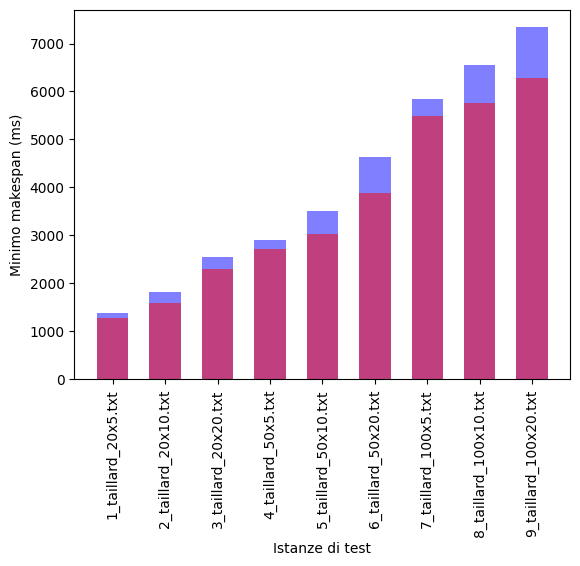

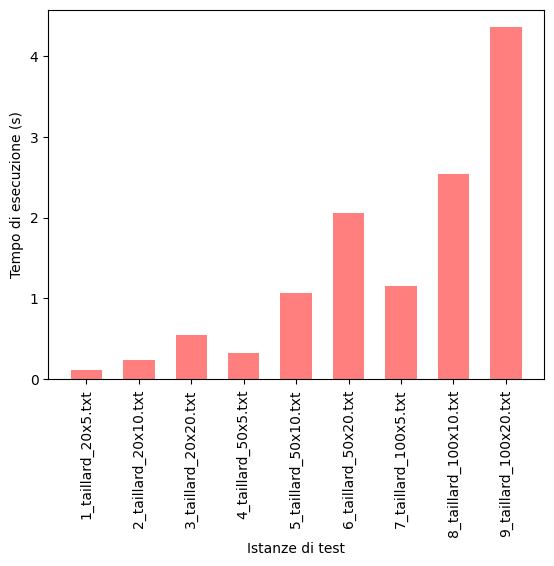

In [3]:
left_coordinates=[1,2,3,4,5,6,7,8,9]

bar_labels = []
heights = []
execution_times = []
upper_bounds = []
for result in results:
    bar_labels.append(result['instance_dim'])
    heights.append(result['result'])
    execution_times.append(result['execution_time'])
    upper_bounds.append(result['upper_bound'])
    
plt.bar(left_coordinates,heights,tick_label=bar_labels,width=0.6,color=['blue'], alpha=.5)
plt.bar(left_coordinates,upper_bounds,tick_label=bar_labels,width=0.6,color=['red'], alpha=.5)
plt.xlabel('Istanze di test')
plt.ylabel('Minimo makespan (ms)')
plt.xticks(rotation=90)
plt.show()

plt.bar(left_coordinates,execution_times,tick_label=bar_labels,width=0.6,color=['red'], alpha=.5)
plt.xlabel('Istanze di test')
plt.ylabel('Tempo di esecuzione (s)')
plt.xticks(rotation=90)
plt.show()

